In [5]:
import pickle
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:


dataset = pd.read_csv('../datasets/titanic.csv', encoding='latin-1')
dataset = dataset.rename(columns=lambda x: x.strip().lower())

dataset=dataset[dataset.columns[1:]] # Delete first column from dataset


dataset['age'] = dataset['age'].fillna(np.mean(dataset['age']))

In [7]:
dataset

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [3]:
le = LabelEncoder() # Convert catregorical data to numeric using self assigned numeric values for each class. Also for numeric data
for i in dataset.columns:
    dataset[i] = le.fit_transform(dataset[i]) # Fits and Transforms all data columns to their corresponding encoded numeric values
    
  

In [4]:
dataset

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,108,1,28,1,0,523,18,147,2
1,1,0,190,0,52,1,0,596,207,81,0
2,1,2,353,0,34,0,0,669,41,147,2
3,1,0,272,0,48,1,0,49,189,55,2
4,0,2,15,1,48,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,548,1,35,0,0,101,85,147,2
887,1,0,303,0,24,0,0,14,153,30,2
888,0,2,413,0,39,1,2,675,131,147,2
889,1,0,81,1,34,0,0,8,153,60,0


In [5]:
dataset.corr()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
survived,1.000000,-0.338481,-0.057343,-0.543351,-0.062470,-0.026385,0.081629,-0.164549,0.333943,-0.254888,-0.163517
pclass,-0.338481,1.000000,0.052831,0.131900,-0.336631,0.078141,0.018443,0.319869,-0.724119,0.684121,0.157112
name,-0.057343,0.052831,1.000000,0.020314,0.057270,-0.035535,-0.049105,0.047348,-0.053846,0.061959,-0.004557
sex,-0.543351,0.131900,0.020314,1.000000,0.078523,-0.123164,-0.245489,0.059372,-0.265389,0.096681,0.104057
age,-0.062470,-0.336631,0.057270,0.078523,1.000000,-0.244913,-0.165137,-0.071081,0.122586,-0.234884,-0.019047
sibsp,-0.026385,0.078141,-0.035535,-0.123164,-0.244913,1.000000,0.423338,0.069238,0.368688,0.040729,0.063983
parch,0.081629,0.018443,-0.049105,-0.245489,-0.165137,0.423338,1.000000,0.020003,0.361243,-0.028324,0.038322
ticket,-0.164549,0.319869,0.047348,0.059372,-0.071081,0.069238,0.020003,1.000000,-0.168153,0.243696,-0.006041
fare,0.333943,-0.724119,-0.053846,-0.265389,0.122586,0.368688,0.361243,-0.168153,1.000000,-0.540116,-0.152946
cabin,-0.254888,0.684121,0.061959,0.096681,-0.234884,0.040729,-0.028324,0.243696,-0.540116,1.000000,0.193205


<AxesSubplot:>

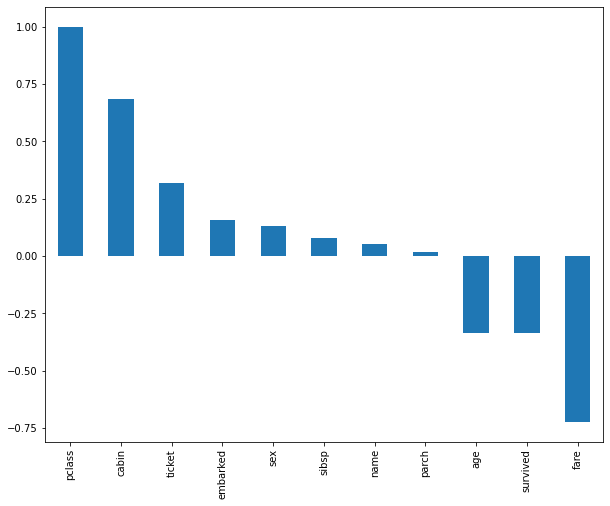

In [17]:
dataset.corrwith(dataset['pclass']).sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

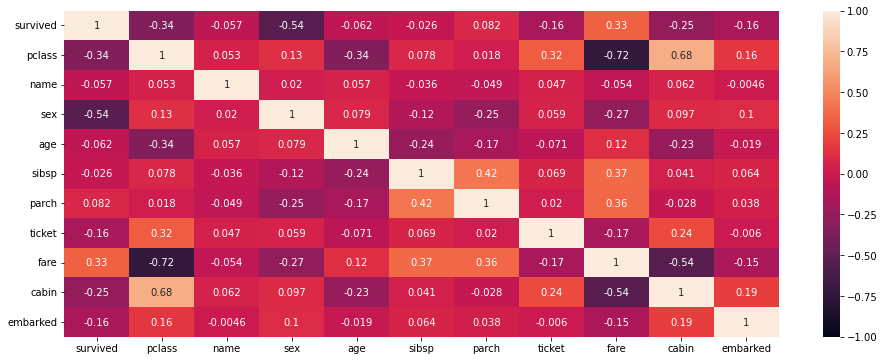

In [18]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [8]:
X = dataset.drop(['pclass'], axis=1) #we want to predict pclass from the given samples so exclude pclass from features
y = dataset['pclass'] #Make pclass as your output y vector

In [9]:
y

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: pclass, Length: 891, dtype: int64

In [20]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)


generativeModel = GaussianNB()

generativeModel.fit(X_train, y_train)
yG_predict = generativeModel.predict(X_test)
yG_predict_p = generativeModel.predict_proba(X_test)

In [21]:
discrimnativeModel = LogisticRegression()
discrimnativeModel.fit(X_train, y_train)
yD_predict = discrimnativeModel.predict(X_test)
yD_predict_p = discrimnativeModel.predict_proba(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


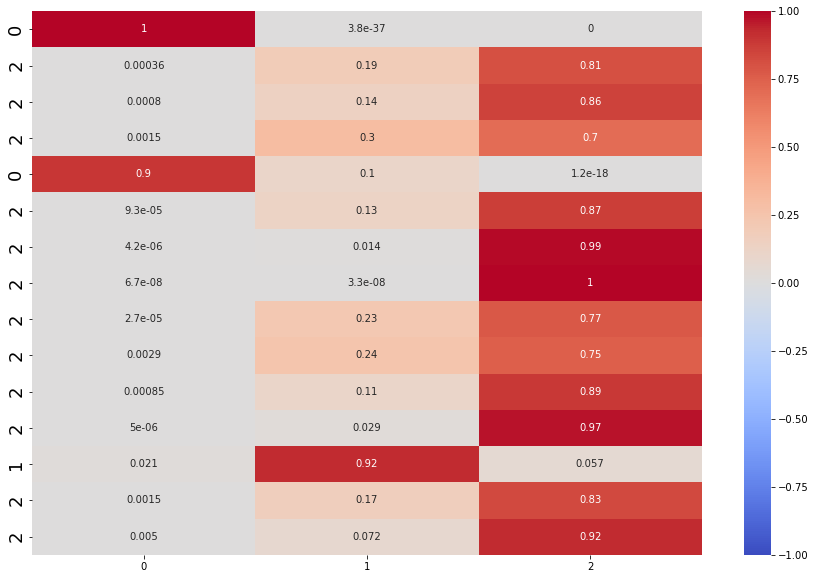

In [22]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(pd.DataFrame(yG_predict_p)[:15], vmin=-1, vmax=1, annot=True,yticklabels=yG_predict[:15],cmap='coolwarm')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.show()

In [23]:
dfg = pd.DataFrame(yG_predict_p,columns='label1_p,label2_p,label3_p'.split(','))
dfg['predicted_label']= yG_predict
dfg['original_label']= list(y_test)
dfg.head(15)

,label1_p,label2_p,label3_p,predicted_label,original_label
0,1.000000e+00,3.824841e-37,0.000000e+00,0,0
1,3.589946e-04,1.937829e-01,8.058581e-01,2,1
2,7.975436e-04,1.431367e-01,8.560658e-01,2,2
3,1.452232e-03,2.985584e-01,6.999894e-01,2,1
4,8.971982e-01,1.028018e-01,1.218330e-18,0,0
5,9.250024e-05,1.303350e-01,8.695725e-01,2,1
6,4.242977e-06,1.396525e-02,9.860305e-01,2,2
7,6.702344e-08,3.342682e-08,9.999999e-01,2,2
8,2.740593e-05,2.257417e-01,7.742309e-01,2,2
9,2.918725e-03,2.435379e-01,7.535434e-01,2,2


In [24]:
dfd = pd.DataFrame(yD_predict_p,columns='label1_p,label2_p,label3_p'.split(','))
dfd['predicted_label']= yD_predict
dfd['original_label']= list(y_test)
dfd.head(15)

,label1_p,label2_p,label3_p,predicted_label,original_label
0,9.999967e-01,0.000003,3.174332e-08,0,0
1,2.911410e-03,0.497456,4.996325e-01,2,1
2,5.704100e-03,0.455804,5.384924e-01,2,2
3,1.302822e-01,0.364661,5.050571e-01,2,1
4,8.099385e-01,0.185141,4.920721e-03,0,0
5,8.015390e-05,0.303903,6.960173e-01,2,1
6,5.923899e-07,0.076171,9.238288e-01,2,2
7,3.646638e-03,0.307866,6.884870e-01,2,2
8,2.188439e-06,0.083124,9.168742e-01,2,2
9,9.853718e-04,0.292625,7.063900e-01,2,2


In [25]:
print(confusion_matrix(y_test,yG_predict))
print()
print(classification_report(y_test,yG_predict))

[[36  5  0]
 [ 1 15 24]
 [ 0  1 97]]

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        41
           1       0.71      0.38      0.49        40
           2       0.80      0.99      0.89        98

    accuracy                           0.83       179
   macro avg       0.83      0.75      0.77       179
weighted avg       0.82      0.83      0.81       179



In [26]:
print(confusion_matrix(y_test,yD_predict))
print()
print(classification_report(y_test,yD_predict))

[[37  4  0]
 [ 1 22 17]
 [ 4  4 90]]

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.73      0.55      0.63        40
           2       0.84      0.92      0.88        98

    accuracy                           0.83       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.83      0.83      0.83       179



In [ ]:

import pyautogui,time
import os

In [ ]:

os.system('start notepad.exe')

time.sleep(3)
for i in range(5):
    
    pyautogui.typewrite('How are you')
    pyautogui.press('enter')

In [ ]:

os.system('start notepad.exe')

In [ ]:
import chess

In [ ]:
b=chess.Board("r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R b KQkq - 3 3")

In [ ]:
b.legal_moves

In [ ]:
b.push_san("Bc5")

In [ ]:
b

In [ ]:
b.fen()